# Distanciel X22M090 : Probabilités pour les sciences exactes, II

Pour avancer dans le notebook et exécuter les cellules : taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondez aux questions en modifiant ce notebook. Normalement vous devriez pouvoir vous contenter d'écrire dans les cellules prévues en dessous de chaque question, cellule texte ou cellule code. N'hésitez pas à insérez des cellules (de type Markdown pour du texte et de type code pour du code, voir menu "Cell"). 

Ensuite vous enregistrez ce notebook sous le nom groupe_Nom_Prenom_X22M090-2.ipynb (comme 4xx_Untel_Luc_X22M090-2.ipynb) ainsi qu'en html, et vous rendez les deux fichiers sur Madoc. Enregistrez souvent !

## Générateurs aléatoires
On l'a signalé dans le premier distanciel, on peut simuler des tirages à l'aide de la commande va.rvs (random variable). Le nom suggère que l'ordinateur effectue un tirage aléatoire. On est obligé ici d'insister sur le fait que cela n'est pas possible. L'ordinateur que vous utilisez est déterministe, ou du moins tout est fait pour que ce soit le cas : pour des entrées égales, l'algorithme du programme produit toujours la même sortie. On se retrouve donc avec l'oxymore "aléa déterministe".

Une idée possible pour obtenir des tirages aléatoires de nombres consiste, au lieu de chercher à se débarrasser du bruit, de le prendre comme source d'aléa. La solution utilisée dans nos commandes Python est d'utiliser un _générateur pseudo-aléatoire_, le "pseudo" cherchant ici à atténuer l'effet de l'oxymore. En voici le principe, très simple. On définit une suite par une relation de récurrence $x_{n+1}=f(x_n)$ et par son premier terme $x_0=s$. La suite est entièrement déterminée par son premier terme : une fois la fonction $f$ fixée, ce processus fournit toujours la même suite de nombres pour le même choix de $s$. On choisit $s$ dans un gros ensemble fini $S$, et tout l'aléa est contenu dans ce choix de $s$, qui peut dépendre du bruit et de toutes sorte de données de votre ordinateur : heure, température etc.  La lettre s vient de l'anglais _seed_, et on parle de _graine_ pour le terme initial $s$. Il est fréquent de produire les premiers termes de suites qui sont en fait périodiques, ce qui est loin de l'aléatoire, mais avec une période longue (vraiment longue, $2^{64}$). 

La commande ```randn``` du paquetage ```numpy.random``` est un tel générateur de nombres pseudo-aléatoire (ou PRNG). 

In [5]:
from numpy import *
from numpy.random import *
#from scipy.stats import *
a=randn(4)
print(a)
b=randn(4)
print(b)

[1.9367371  2.09115736 1.08885    1.05316307]
[-1.44721737 -1.56990118 -1.10940813  1.30837599]


**Question** - Exécuter de nouveau les commandes de la cellule précédente. Pourquoi la même commande ```randn(4)``` répétée ne donnent-elle pas deux fois le même résultat ?

In [ ]:
# Cela s'explique par le fait que randn(4) soit un générateur de nombres pseudo-aléatoire donc il produit des résultats différents (qui se répètent mais avec une période longue) si on recalcule peu de fois. 

On peut préciser la graine initiale :

In [15]:
from numpy import *
from numpy.random import *
print("mais si on impose la graine :")
seed(0) ; a0=random(6)
print(a0)
print("on retrouve :")
seed(0) ; b0=random(6)
print(b0)

mais si on impose la graine :
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]
on retrouve :
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]


**Question** - Essayer ce code.  Pourquoi la commande ```randn(6)``` répétée donnent-elle maintenant deux fois le même résultat ?

In [ ]:
# Cela est dû à l'instruction seed(0) qui réinitialise la graine à chaque fois donc on réalise les mêmes opérations en partant de la même graine pour a0 et b0, ainsi, on a le même résultat final.

**Question** - Essayer aussi la commande random. Que produit-elle ?

In [ ]:
# a0 et b0 restent identiques mais leur valeur diffère par rapport à ce qu'on obtenait avec randn(6).

Les plus curieux peuvent aller voir dans le menu d'aide de numpy (Help/NumPy Reference) ; on y apprend que la fonction randn est importée de Matlab, qui n'est pas du domaine public ("open source"), contrairement par exemple à la fonction ```rand``` dans Scilab. Cherchez avec votre moteur de recherche favori les mots :
```matlab période randn``` pour trouver la valeur de la période indiquée plus haut, et profitez-en pour apprendre la signification de _ziggurat_ après celle d'_oxymore_.

En guise d'application, le code ci-dessous définit une fonction ```binomiale``` à partir de la fonction ```random``` à valeurs dans $[0,1[$. Elle doit donner le même résultat que la fonction ```binomial``` du paquetage ```scipy.stats``` utilisée en partie I du distanciel.

In [43]:
def Bernoulli(p) :
    if random() < p :
        return 1
    else :
        return 0
def binomiale(n,p):
    u=0
    for i in range(n) :
        u=u+Bernoulli(p)
    return u
print("binomiale", binomiale(3600,1/6),", et pour binomial", binomial(3600,1/6))

binomiale 594 , et pour binomial 592


**Question** - Est-ce normal que les résultats soient différents ?

In [ ]:
# Oui car Bernoulli() renvoie la valeur 0 ou 1 en fonction de random() et la boucle pour dans binomiale() ajoute à u le résultat de Bernoulli() à chaque itération. La valeur de random() n'étant jamais la même, le résulat final est différent à chaque fois. 

Pour pouvoir mieux comparer des simulations, il peut être agréable de visualiser les données. Nous allons donc maintenant tracer des histogrammes. 

## Tracé d'un histogramme

Pour les graphiques, chacun a ses habitudes et ses commandes favorites. Par exemple, ```linspace(départ, fin, nombre d'éléments)``` permet d’obtenir un tableau 1D allant d’une valeur de départ à une valeur de fin avec un nombre donné d’éléments.
Dans la cellule suivante, ajustez le dernier argument de np.linspace pour obtenir des valeurs entières dans le tableau x, et vérifiez en exécutant.

In [45]:
import numpy as np 
x = np.linspace(500, 700, 100).astype(int)
print(x)

[500 502 504 506 508 510 512 514 516 518 520 522 524 526 528 530 532 534
 536 538 540 542 544 546 548 550 552 554 556 558 560 562 564 566 568 570
 572 574 576 578 580 582 584 586 588 590 592 594 596 598 601 603 605 607
 609 611 613 615 617 619 621 623 625 627 629 631 633 635 637 639 641 643
 645 647 649 651 653 655 657 659 661 663 665 667 669 671 673 675 677 679
 681 683 685 687 689 691 693 695 697 700]


On trace maintenant un histogramme en utilisant le paquetage ```pyplot```, la simulation intégrée dans la commande ```rvs```, et la fonction ```binom``` du paquetage ```scipy.stats``` :

[36 31 33 27 30 34 33 33 37 28 37 32 35 25 26 23 24 27 31 28 29 23 27 32
 27 29 23 34 29 26 38 34 31 24 27 33 26 31 38 32]
(array([5., 1., 8., 2., 4., 4., 7., 3., 2., 4.]), array([23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5, 38. ]), <a list of 10 Patch objects>)


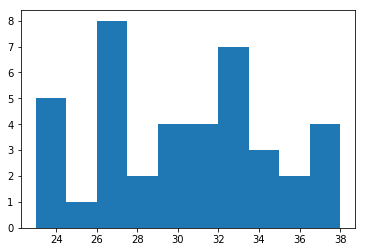

In [3]:
from scipy.stats import binom
from matplotlib.pyplot import *
va = binom(100,0.3)
# simuler un tirage
x=va.rvs(size=40)
# afficher le tirage et son histogramme
print(x)
H=hist(x)
print(H)

Les options de ```hist``` permettent d'adapter l'histogramme. Par exemple bins désigne le nombre d'intervalles en abscisse. 

**Question** - Expérimentez en variant les valeurs du paramètre ```bin```, par exemple :

(array([7., 1., 3., 4., 2., 6., 7., 7., 1., 2.]), array([24. , 25.3, 26.6, 27.9, 29.2, 30.5, 31.8, 33.1, 34.4, 35.7, 37. ]), <BarContainer object of 10 artists>)


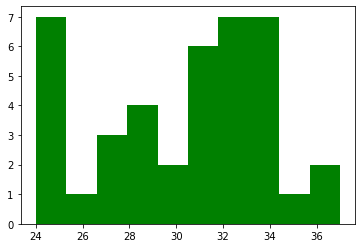

In [60]:
from scipy.stats import binom
from matplotlib.pyplot import *
va = binom(100,0.3)
x=va.rvs(size=40)
G=hist(x, bins=10, facecolor='green')
print(G)

In [ ]:
H=hist(x, bins=range(24, 31))
print(H)

On peut essayer de comparer l'histogramme avec la fonction de densité.

**Question** - Compléter le code de la cellule suivante avec le code que vous avez saisie dans la cellule précédente pour visualiser les deux en une seule figure permettant la comparaison. Vous devrez ajuster l'échelle en y de manière à tenir compte de votre choix de valeur pour ```bin``` dans la cellule précédente.

(array([ 1.,  0.,  3.,  1., 10., 14.,  2.,  5.,  3.,  1.]), array([14. , 16.7, 19.4, 22.1, 24.8, 27.5, 30.2, 32.9, 35.6, 38.3, 41. ]), <BarContainer object of 10 artists>)
(array([0., 2., 4., 4., 7., 7.]), array([24, 25, 26, 27, 28, 29, 30]), <BarContainer object of 6 artists>)
range(10, 30)


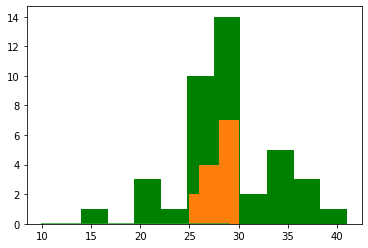

In [69]:
from scipy.stats import binom
from matplotlib.pyplot import *
va1 = binom(100,0.3)
x1=va.rvs(size=40)
G=hist(x1, bins=10, facecolor='green')
print(G)
H=hist(x1, bins=range(24, 31))
print(H)

va2 = binom(3600,1/6)
x2=range(10,30)
print(x2)
y=va2.pmf(x2)
P=plot(x2, y)
print(P)

_Remarque - La fonction de répartition de la partie I du distanciel est plus commode à manipuler que les histogrammes, ce serait déjà mieux. Plusieurs méthodes de validation des données simulées ont été développées. Les tests d'uniformité ou les méthodes usuelles (fonction inverse, rejet) dépassent les objectifs de ce distanciel._

Pour terminer, quelques exercices avec les commandes ```cdf``` et ```ppf```.

**Question** - Calculer la probabilité que le nombre de 1 dans les 3600 tirages soit compris entre 480 et 720.

In [74]:
# Cela donne 0.999999909008877

**Question** - Quelle valeur du nombre de 1 obtenus devient moins probable que 5% ? Comparez avec les valeurs donnés en cours en utilisant les inégalités de Markov et de Tchebychev.

In [ ]:
# La valeur recherchée est 563.0

**Question** - Exécuter la commande suivante. Devrait-on trouver 0.5 ?

In [75]:
va.cdf(600)

1.0

In [ ]:
# Oui car si va.cdf(600) = 1.0, cela signifie que P(X <= 600) = 1.0 or c'est impossible. Par ailleurs, quand on exécute va.ppf(0.5), on obtient bien 600 donc 0.5 est le résultat attendu.  

Enregistrez votre travail en notebook groupe_Nom_Prenom_X22M090-2.ipynb et en html groupe_Nom_Prenom_X22M090-2.html, et rendez les deux fichiers comme devoir sur madoc.
    Cette activité de prise en main doit être finalisée individuellement. Indiquez si vous avez travaillé en groupe en signalant avec qui dans la cellule ci-dessous.

In [ ]:
Activité complétée avec moi-même

## Fin